In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## read coo json

In [4]:
import os
import glob
from tool.coco_json import read_json
ann,categories =  read_json(r'C:\dataset\jinnan2_round1_train_20190305\jinnan2_round1_train_20190305\train_no_poly.json')

In [5]:
ann

defaultdict(list,
            {'190109_180343_00154162.jpg': [[158, 63, 355, 108, 5],
              [176, 67, 339, 105, 5],
              [239, 103, 305, 159, 4],
              [167, 107, 235, 194, 4]],
             '190109_180346_00154163.jpg': [[134, 107, 293, 156, 4]],
             '190109_180437_00154165.jpg': [[321, 90, 354, 191, 4]],
             '190109_180542_00154168.jpg': [[227, 108, 299, 211, 5],
              [165, 184, 243, 235, 5],
              [170, 60, 225, 153, 4],
              [87, 116, 186, 162, 4]],
             '190109_180635_00154171.jpg': [[226, 47, 309, 140, 4]],
             '190109_180655_00154173.jpg': [[150, 46, 344, 86, 5],
              [245, 76, 303, 178, 5],
              [40, 133, 142, 182, 4],
              [151, 91, 229, 182, 4]],
             '190109_180853_00154178.jpg': [[255, 97, 333, 207, 5],
              [60, 90, 167, 148, 4],
              [168, 87, 249, 180, 4]],
             '190109_180958_00154183.jpg': [[164, 42, 305, 84, 5],
           

##   画框保存为png

In [6]:
import cv2

In [7]:
imgdir = r'C:\dataset\jinnan2_round1_train_20190305\jinnan2_round1_train_20190305\restricted'
all_boxes = []
for filename,gtboxes in ann.items():
    filename = filename.split('.')[0]
    imgfile = os.path.join(imgdir,filename+'.JPG')
    img = cv2.imread(imgfile)
    for box in gtboxes:
        x1 = int(box[0])
        y1 = int(box[1])
        x2 = int(box[2])
        y2 = int(box[3])
        all_boxes.append([x1,y1,x2,y2])
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),2,cv2.LINE_AA)
    cv2.imwrite(os.path.join(imgdir,filename+'.png'),img)

## 转换为训练格式

In [8]:
labelfile = os.path.join(imgdir,'train.txt')

In [9]:
import numpy as np 
### 统计类别 
classid=[]
for filename,gtboxes in ann.items():
    classid += list(np.array(gtboxes)[:,4])
#统计分布
from collections import Counter
ct = Counter(classid)


In [10]:
ct,categories

(Counter({1: 317, 2: 1729, 3: 789, 4: 1783, 5: 697}),
 [{'id': 1, 'name': '铁壳打火机', 'supercategory': 'restricted_obj'},
  {'id': 2, 'name': '黑钉打火机', 'supercategory': 'restricted_obj'},
  {'id': 3, 'name': '刀具', 'supercategory': 'restricted_obj'},
  {'id': 4, 'name': '电源和电池', 'supercategory': 'restricted_obj'},
  {'id': 5, 'name': '剪刀', 'supercategory': 'restricted_obj'}])

In [11]:
with open(labelfile,'w',encoding='utf-8') as f:
    for filename,gtboxes in ann.items():
        filename = filename.split('.')[0]
        imgfile = os.path.join(imgdir,filename+'.JPG')
        str_label = imgfile
        for box in gtboxes:
            str_label = str_label +' '+ ','.join(str(i-1) for i in box)
        f.writelines(str_label+'\n')
    

## 确定achor box的大小

In [12]:
from kmeans import YOLO_Kmeans
import matplotlib.pyplot as plt
import numpy as np 

(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG
(7).JPG


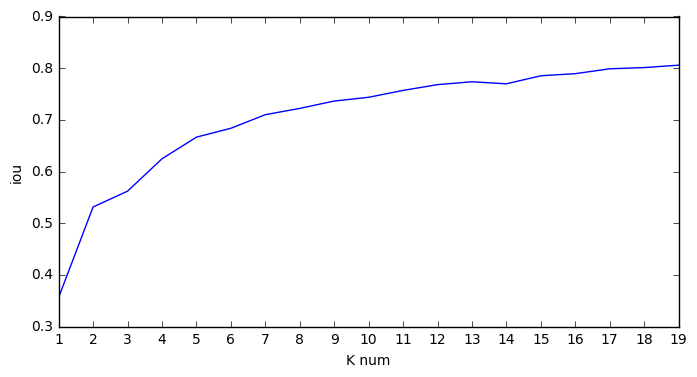

In [13]:
iou_y = []
cluster_x=[]
filename = labelfile

for cluster_number in range(1,20):
    kmeans = YOLO_Kmeans(cluster_number, filename,imgdir,(416,416))
    _,avg,all_boxes  = kmeans.txt2clusters()
    iou_y.append(avg)
    cluster_x.append(cluster_number)
    
plt.figure(figsize=(8,4)) #
plt.xlabel("K num") 
plt.ylabel("iou")  
my_x_ticks = np.arange(0,20, 1)
plt.xticks(my_x_ticks)
plt.plot(cluster_x,iou_y)
plt.show()

In [14]:
kmeans = YOLO_Kmeans(9, filename,imgdir,(416,416))
anchor,avg,all_boxes  = kmeans.txt2clusters()

(7).JPG


[[ 22.  31.]
 [ 41.  54.]
 [ 48.  18.]
 [ 64. 103.]
 [ 70.  45.]
 [ 87.  27.]
 [108.  93.]
 [152.  76.]
 [165.  44.]]


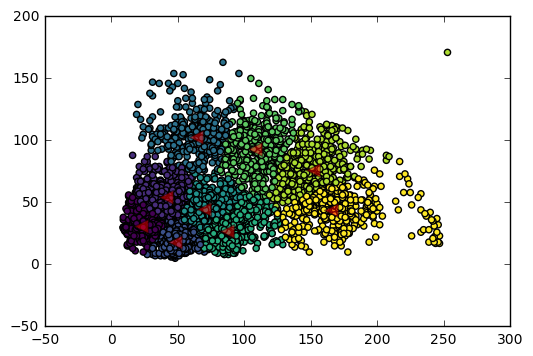

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)  # 将数据聚类
kmeans.cluster_centers_ = anchor
y_kmeans = kmeans.predict(all_boxes)  # 预测

plt.scatter(all_boxes[:, 0], all_boxes[:, 1],c=y_kmeans ,s=20, cmap='viridis')  # c是颜色，s是大小
centers = kmeans.cluster_centers_  # 聚类的中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='<',alpha=0.5)  
print(centers)
plt.show()  # 展示

In [16]:
w,h = (3072,2084)

In [17]:
3072/1056

2.909090909090909

In [18]:
928/32

29.0

## 验证

In [19]:
input_shape=(416,416)

In [20]:
with open(filename) as f:
    lines = f.readlines()

In [94]:
from model.generator import get_random_data,preprocess_gt_boxes
import config

In [105]:
from model.generator import Generator
batch_size = 24
gen = Generator(r'C:\dataset\jinnan2_round1_train_20190305\jinnan2_round1_train_20190305\restricted\train.txt',
                batch_size = batch_size,
                num_classes = config.num_classes,
                shape  = (416,416))

In [113]:
[imgs,*y_true],b= next(gen)

In [114]:
img = imgs[0]
y1,y2,y3 = y_true
y_true = [y1[0],y2[0],y3[0]]
gen.lines[gen.idx[0]]


'C:\\dataset\\jinnan2_round1_train_20190305\\jinnan2_round1_train_20190305\\restricted\\190127_135244_00178149.JPG 123,178,173,267,2 344,232,448,334,2\n'

[[102.95652151 237.94344473  34.78260865  95.1773782  102.95652008
  237.94345093  34.78260803  95.17737579]]
[[275.47826076 302.64267349  72.34782621 109.07969149 275.47827148
  302.64266968  72.3478241  109.07968903]]
[]


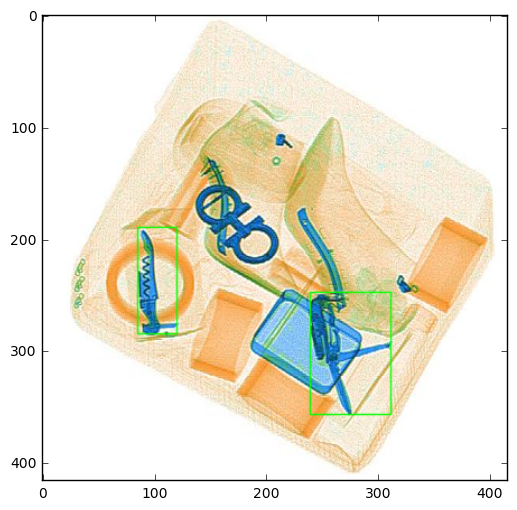

In [115]:
# img,boxes = get_random_data(lines[-2],input_shape)
# print(lines[-2])
#print(lines[1],boxes)
img = img * 255
img = img.astype(np.uint8)

# boxes = boxes.astype(np.int32)
# print(boxes)
# for box in boxes:
#     cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,0,255),3,cv2.LINE_AA)
    
# import config 
# grid_shapes = config.grid_shapes(np.array(input_shape))
# y_true = preprocess_gt_boxes(boxes,grid_shapes)

for i,y in enumerate(y_true):
    anchors = config.yolo_layer_anchor[i]
    anchors = np.array(anchors)
    num_anchors = len(anchors)
    
    grid_shape =grid_shapes[i]

    #生成坐标网格xy
    grid_y = np.tile(np.reshape(np.arange(0,grid_shape[0]),[-1,1,1,1]),   # like (13,1,1,1)
                    [1,grid_shape[1],1,1]   # like (13,13,1,1)
                    )
    grid_x = np.tile(np.reshape(np.arange(0,grid_shape[1]),[1,-1,1,1]), # like(1,13,1,1)
                    [grid_shape[0],1,1,1]
                    )
    grid = np.concatenate([grid_x,grid_y],axis=-1)

    stride = config.stride[i]
    
    y[...,:2] = (y[...,:2]+grid) * stride 
    y[...,2:4] = np.exp(y[...,2:4]) * anchors 
    
    obj = y[...,8]
    raw = y[obj==1][:,0:8]
    print(raw)
        
        
    boxes = y[obj==1][:,4:8]
    
    for box in boxes :
        x1 = int(box[0] - box[2]/2)
        y1 = int(box[1] - box[3]/2)
        x2 = int(box[0] + box[2]/2)
        y2 = int(box[1] + box[3]/2)
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,),1,cv2.LINE_AA)

plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(img,aspect='auto')

In [23]:
obj.shape

(13, 13, 3)

In [24]:
y_true[0][]

SyntaxError: invalid syntax (<ipython-input-24-3180e09e73b9>, line 1)

In [70]:
a = next(gen)

In [71]:
gen.idx

array([363, 567, 780,  96, 196, 434,   7, 217, 832,  46, 564, 731, 103,
       258, 157,  23, 530, 431, 726, 967, 659, 611, 692, 475])